
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 1 <br>
</div>


---





```
# This is formatted as code
```

### Full Name : mohamad hosein mehdikhani
### Student Number : 400102039
___

## Introduction

In this assignment, we are going to investigate some of the basic methods of image enhancement.

## Section 1: Image Enhancement

Importing necessary Libraries. You cannot import and use any other libraries

In [1]:
# Do not modify this cell
import cv2
import numpy as np
import matplotlib.pylab as plt


Just for math needed

In [2]:
from math import log

### Q1: Intensity Enhancement


In this question, you will implement some of the intensity processing functions and apply them on a given image. In the final part, you will be asked to use these functions to enhance the intensity of a given image.

<ol>
<li>
 <b>Negative Transform :</b> $y=255-x$

 <li>
 <b>Log Transform :</b> $y=\frac{255 \log(1+ \alpha x)}{\log(1+255 \alpha)}$

 <li>
 <b>Gamma Transform :</b> $y=255(\frac{x}{255})^{\gamma}$

 </ol>

In the following cells, complete the functions for

In [3]:
def negative_transform(img: np.ndarray) -> np.ndarray:

    return 255 - img


In [4]:

def log_transform(img: np.ndarray, alpha: float) -> np.ndarray:

    img_float = img.astype(np.float32)

    numerator = np.log1p(alpha * img_float)
    denominator = log(1 + 255 * alpha)
    transformed = 255 * numerator / denominator

    return np.clip(transformed, 0, 255).astype(np.uint8)

In [5]:
def gamma_transform(img: np.ndarray, gamma: float) -> np.ndarray:

    normalized = img.astype(np.float32) / 255.0
    transformed = np.power(normalized, gamma) * 255.0

    return np.clip(transformed, 0, 255).astype(np.uint8)

Now, apply these transformations on `Q1-input1.jpg` (on RGB channels) and save the output images in `Q1-output-neg.jpg`, `Q1-output-log.jpg` and `Q1-output-gamma.jpg`, respectively. You can set $\alpha$ and $\gamma$ whatever you want, but effect on the intensity of the image should be noticable.

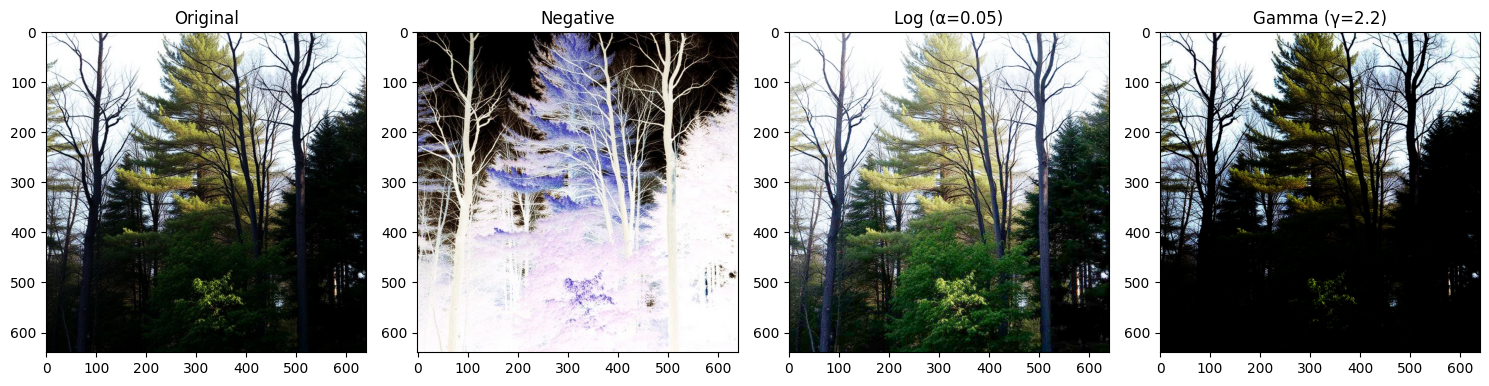

In [6]:
img = cv2.imread('Q1-input1.jpg')

neg_img = negative_transform(img)


log_img = log_transform(img, alpha=0.05)


gamma_img = gamma_transform(img, gamma=2.2)


cv2.imwrite('Q1-output-neg.jpg', neg_img)
cv2.imwrite('Q1-output-log.jpg', log_img)
cv2.imwrite('Q1-output-gamma.jpg', gamma_img)


plt.figure(figsize=(15,5))


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
neg_rgb = cv2.cvtColor(neg_img, cv2.COLOR_BGR2RGB)
log_rgb = cv2.cvtColor(log_img, cv2.COLOR_BGR2RGB)
gamma_rgb = cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB)

plt.subplot(1,4,1), plt.imshow(img_rgb), plt.title('Original')
plt.subplot(1,4,2), plt.imshow(neg_rgb), plt.title('Negative')
plt.subplot(1,4,3), plt.imshow(log_rgb), plt.title('Log (α=0.05)')
plt.subplot(1,4,4), plt.imshow(gamma_rgb), plt.title('Gamma (γ=2.2)')
plt.tight_layout()
plt.show()


Finally, use the functions you implemented to enhance the intensity of `Q1-input2.jpg`. You may use any of the functions in anyway you desire. Your final score on the question depends on the quality of the output. Save the output image as `Q1-output-enhanced.jpg`.

In [7]:

def enhance_image(img_path: str, output_path: str):

    img = cv2.imread(img_path)


    gamma_corrected = gamma_transform(img, gamma=0.6)

    log_transformed = log_transform(gamma_corrected, alpha=0.03)

    enhanced = cv2.addWeighted(log_transformed, 0.6, img, 0.4, 0)

    lab = cv2.cvtColor(enhanced, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)

    enhanced_lab = cv2.merge((l, a, b))
    final_enhanced = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)


    cv2.imwrite(output_path, final_enhanced)

    display_comparison(img, final_enhanced)

    return final_enhanced

def display_comparison(original, enhanced):

    plt.figure(figsize=(10,5))

    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)

    plt.subplot(1,2,1), plt.imshow(original_rgb), plt.title('Original')
    plt.subplot(1,2,2), plt.imshow(enhanced_rgb), plt.title('Enhanced')
    plt.tight_layout()
    plt.show()

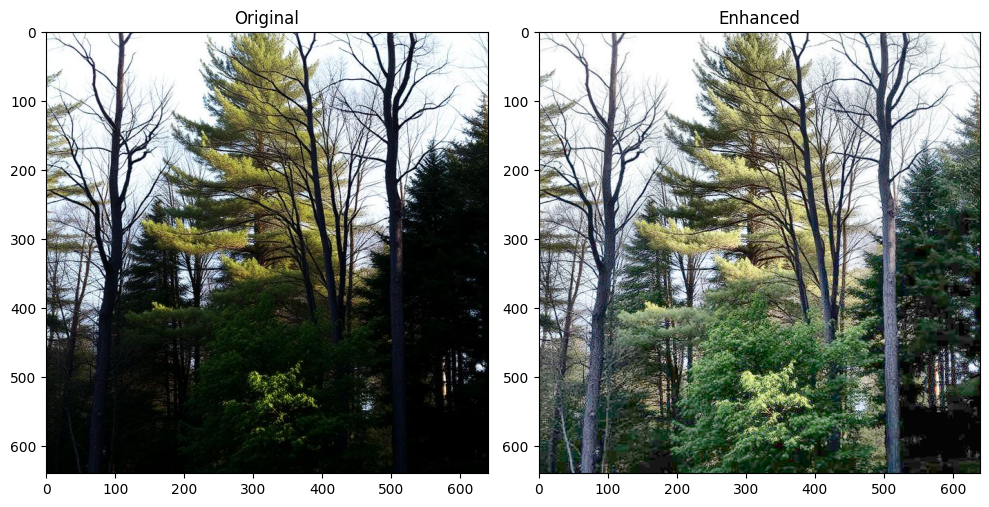

array([[[253, 253, 246],
        [224, 222, 214],
        [194, 192, 185],
        ...,
        [203, 202, 199],
        [224, 221, 216],
        [253, 253, 246]],

       [[243, 241, 233],
        [253, 253, 246],
        [253, 253, 246],
        ...,
        [217, 215, 212],
        [224, 222, 214],
        [243, 240, 235]],

       [[252, 252, 250],
        [252, 252, 250],
        [253, 252, 249],
        ...,
        [238, 237, 231],
        [231, 228, 223],
        [234, 231, 226]],

       ...,

       [[ 32,  36,  23],
        [ 32,  36,  23],
        [ 32,  36,  23],
        ...,
        [ 16,  40,  27],
        [ 16,  40,  27],
        [ 11,  31,  10]],

       [[ 32,  36,  23],
        [ 32,  36,  23],
        [ 32,  36,  23],
        ...,
        [ 16,  40,  27],
        [ 16,  40,  27],
        [ 11,  31,  10]],

       [[ 32,  36,  23],
        [ 32,  36,  23],
        [ 32,  36,  23],
        ...,
        [ 16,  40,  27],
        [ 16,  40,  27],
        [ 11,  31,  10]]], dtype=uint8)
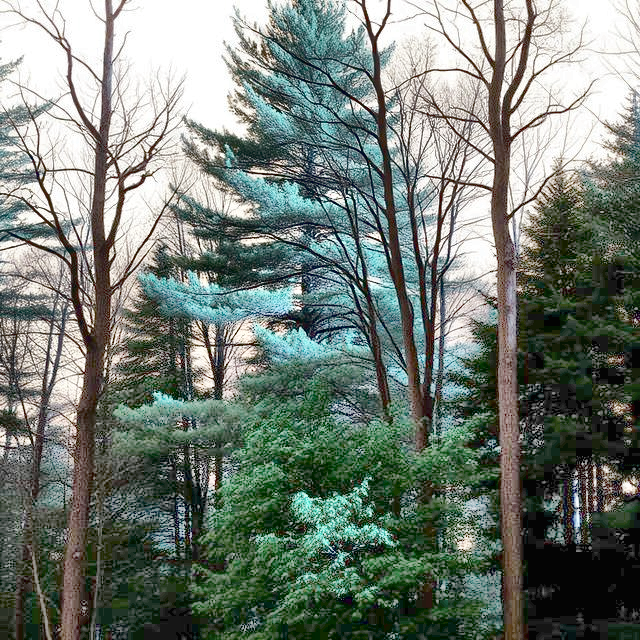

In [8]:

enhance_image('/content/Q1-input1.jpg', '/content/Q1-output-enhanced.jpg')


### Q2: Histogram Specification


In this question, we will implement histogram specification for intensity enhancement.

Complete the following code to specify the histogram of the input image, with a given histogram `hist1`, to target histogram `hist2`.

**Note**: Assume that the input image has only one channel, i.e, it is a $H \times W$ numpy array.

In [12]:
from scipy.interpolate import interp1d

def histogram_specification(img: np.ndarray, reference_img: np.ndarray) -> np.ndarray:

    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if len(reference_img.shape) == 3:
        reference_img = cv2.cvtColor(reference_img, cv2.COLOR_BGR2GRAY)


    hist1, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))
    hist2, _ = np.histogram(reference_img.flatten(), bins=256, range=(0, 256))

    cdf1 = hist1.cumsum()
    cdf1 = (cdf1 - cdf1.min()) * 255 / (cdf1.max() - cdf1.min())

    cdf2 = hist2.cumsum()
    cdf2 = (cdf2 - cdf2.min()) * 255 / (cdf2.max() - cdf2.min())

    interp_func = interp1d(cdf2, np.arange(256), bounds_error=False, fill_value=(0, 255))

    mapping = interp_func(cdf1).astype(np.uint8)

    matched_img = mapping[img]

    return matched_img


To test the above code, open `Q2-input1.jpg` and `Q2-input2.jpg`, and convert the histogram of the first one to the second one. Save the resulting image as `Q2-output.jpg`. The aim of specifying the histograms is to enhance the first image, so your score depends on the quality of your result.

In [11]:
def color_histogram_specification(img, reference_img):

    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    ref_lab = cv2.cvtColor(reference_img, cv2.COLOR_BGR2LAB)

    l1, a1, b1 = cv2.split(img_lab)
    l2, a2, b2 = cv2.split(ref_lab)

    l_matched = histogram_specification(l1, l2)

    matched_lab = cv2.merge((l_matched, a1, b1))
    matched_bgr = cv2.cvtColor(matched_lab, cv2.COLOR_LAB2BGR)

    return matched_bgr

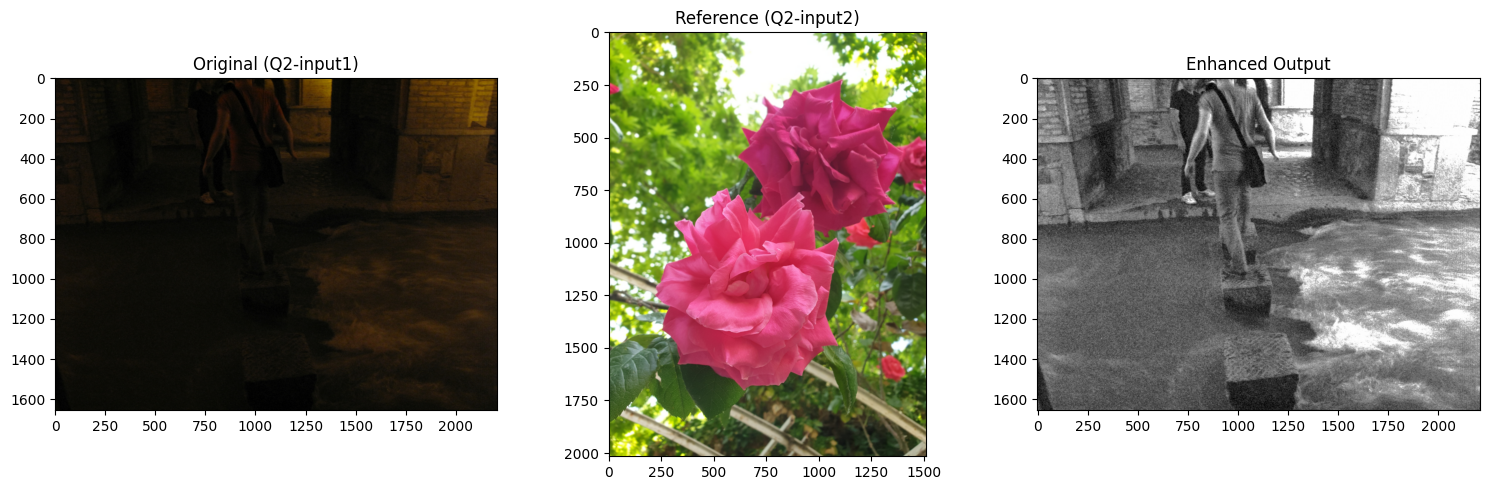

In [13]:
img1=cv2.imread('Q2-input1.jpg')
img2=cv2.imread('Q2-input2.jpg')

img1 = cv2.GaussianBlur(img1, (3,3), 0)
img2 = cv2.GaussianBlur(img2, (3,3), 0)

enhanced_img = histogram_specification(img1, img2)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_img = clahe.apply(enhanced_img)

cv2.imwrite('Q2-output.jpg', enhanced_img)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('Original (Q2-input1)')
plt.subplot(1,3,2), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('Reference (Q2-input2)')
plt.subplot(1,3,3), plt.imshow(enhanced_img, cmap='gray'), plt.title('Enhanced Output')
plt.tight_layout()
plt.show()

### Q3: Color Processing

In image `Q3-input.jpg`, change the color of the flowers red, blue and yellow to violet, pink and orange respectively. Save the result as `Q3-output.jpg`. Your score of this question depends on the quality of the output image.

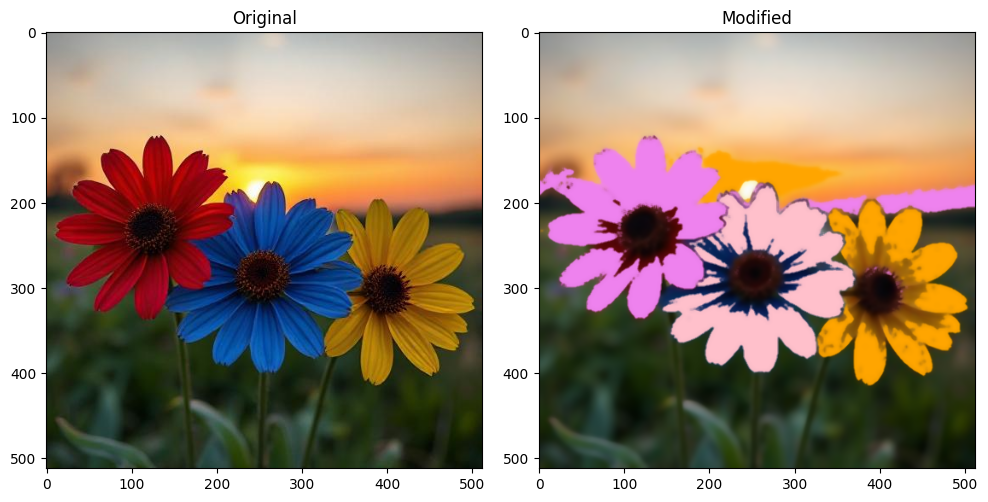

In [14]:

def change_flower_colors(img_path, output_path):

    img = cv2.imread(img_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    red_lower1 = np.array([0, 100, 100])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([160, 100, 100])
    red_upper2 = np.array([180, 255, 255])

    blue_lower = np.array([100, 100, 100])
    blue_upper = np.array([140, 255, 255])

    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([40, 255, 255])

    red_mask1 = cv2.inRange(img_hsv, red_lower1, red_upper1)
    red_mask2 = cv2.inRange(img_hsv, red_lower2, red_upper2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)

    blue_mask = cv2.inRange(img_hsv, blue_lower, blue_upper)
    yellow_mask = cv2.inRange(img_hsv, yellow_lower, yellow_upper)

    violet = [238, 130, 238]
    pink = [203, 192, 255]
    orange = [0, 165, 255]

    output = img.copy()

    output[red_mask > 0] = violet

    output[blue_mask > 0] = pink

    output[yellow_mask > 0] = orange

    kernel = np.ones((3,3), np.float32)/9
    output = cv2.filter2D(output, -1, kernel)

    cv2.imwrite(output_path, output)

    return output
red_lower1 = np.array([0, 50, 50])

kernel = np.ones((5,5), np.float32)/25

output_img = change_flower_colors('Q3-input.jpg', 'Q3-output.jpg')


output_img = cv2.bilateralFilter(output_img, 9, 75, 75)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(cv2.imread('Q3-input.jpg'), cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)), plt.title('Modified')
plt.tight_layout()
plt.show()

## Section 2: Spatial Filters

### Q4: Blurring

In this question, you are going to implement a function to blur a given image using a specified method. Your function should support box filter, gaussian filter and median filter. It is permitted to use `opencv` to perform the bluring.

In [15]:

def blur(img: np.ndarray, kernel_size: int, filter: str) -> np.ndarray:

    if kernel_size <= 0 or kernel_size % 2 == 0:
        raise ValueError("Kernel size must be a positive odd integer.")

    if filter == 'box':
        blurred_img = cv2.blur(img, (kernel_size, kernel_size))
    elif filter == 'gaussian':
        blurred_img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    elif filter == 'median':
        blurred_img = cv2.medianBlur(img, kernel_size)
    else:
        raise ValueError("Filter must be 'box', 'gaussian', or 'median'.")

    return blurred_img


Test your code with kernel size $k=3, 11, 25$ for each of filters on `Q4-input.jpg`. Save the output images with the following format:
<ul>
<li> Box filter with kernel size $k=3, 11, 25$ as Q4-output-box3.jpg, Q4-output-box11.jpg and Q4-output-box25.jpg.

<li> Gaussian filter with kernel size $k=3, 11, 25$ as Q4-output-gauss3.jpg, Q4-output-gauss11.jpg and Q4-output-gauss25.jpg (you can set $\sigma$ whaever you wish, but blurring should be observable).

<li> Median filter with kernel size $k=3, 11, 25$ as Q4-output-med3.jpg, Q4-output-med11.jpg and Q4-output-med25.jpg.
</ul>

In [16]:

input_img = cv2.imread('Q4-input.jpg')

if input_img is None:
    raise FileNotFoundError("Could not load 'Q4-input.jpg'. Please check the file path.")

kernel_sizes = [3, 11, 25]

for k in kernel_sizes:

    box_blurred = blur(input_img, k, 'box')
    cv2.imwrite(f'Q4-output-box{k}.jpg', box_blurred)

    gauss_blurred = blur(input_img, k, 'gaussian')
    cv2.imwrite(f'Q4-output-gauss{k}.jpg', gauss_blurred)

    median_blurred = blur(input_img, k, 'median')
    cv2.imwrite(f'Q4-output-med{k}.jpg', median_blurred)

print("Blurring completed. Output images saved.")

def display_results():
    plt.figure(figsize=(12, 8))
    filters = ['box', 'gauss', 'med']
    titles = ['Box Filter', 'Gaussian Filter', 'Median Filter']

    for i, (filt, title) in enumerate(zip(filters, titles)):
        for j, k in enumerate(kernel_sizes):
            img = cv2.imread(f'Q4-output-{filt}{k}.jpg')
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(3, 3, i * 3 + j + 1)
            plt.imshow(img_rgb)
            plt.title(f'{title} (k={k})')
            plt.axis('off')

    plt.tight_layout()
    plt.show()


Blurring completed. Output images saved.


### Q5: Sharpening

In this question, you are going to sharpen a given image using Gaussian Filter.


Let $f$ be the source image and $g$ be the Gaussian kernel, then $f*g$ is the convolution of the image with this kernel, which results in a blurred image.

To sharpen the image, we can generate an unsharp mask by subtracting the blurred image from the original image:
$$m=f-f*g$$
This mask is a transparent image which has higher intensity on the edges of the original image. Now we may add this mask with a weight $\alpha$ to sharpen the original image:
$$f'=f+ \alpha m$$

First, complete the following function to generate a Gaussian kernel with a given size and $\sigma$. A $(2k+1) \times (2k+1)$ Gaussian kernel has the value $e^{\frac{-(x^2+y^2)}{2 \sigma^2}}$ at point $(x,y)$ (Center of the kernel has coordinates $(0,0)$, and we have $x,y \in [-k,k]$). You should also normalize the kernel (sum of the entries should app up to 1)

In [20]:
def gaussian_kernel(kernel_size: int, sigma: float) -> np.ndarray:

    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd.")

    k = kernel_size // 2
    x = np.arange(-k, k + 1)
    y = np.arange(-k, k + 1)
    xx, yy = np.meshgrid(x, y)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

Next, complete the following function to sharpen a given image and Gaussian kernel and $\alpha$. Your function should return both the sharpened image and the unsharp mask.

In [19]:

def sharpen_image(img: np.ndarray, kernel_size: int, sigma: float, alpha: float) -> tuple[np.ndarray, np.ndarray]:

    kernel = gaussian_kernel(kernel_size, sigma)
    blurred = cv2.filter2D(img, -1, kernel)
    mask = img - blurred
    sharpened = img + alpha * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    mask = (mask - mask.min()) / (mask.max() - mask.min()) * 255
    mask = mask.astype(np.uint8)
    return sharpened, mask

Now to test your code, open `Q5-input.jpg` and sharpen it using the above function. Use a kernel size of 7 and choose a suitable value of $\sigma$ and $\alpha$ to get a desirable result. Save the sharpened image as `Q5-output-1.jpg` and the unsharp mask (grayscale image) as `Q5-output-2.jpg`. Your score on this part depends on the quality of the result.

In [21]:


img_path = "/content/Q5-input.png"
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

if img is None:
    raise FileNotFoundError(f"Could not load image at '{img_path}'. Check if the file exists and the path is correct.")

img = img.astype(np.float32)

sharpened, unsharp_mask = sharpen_image(img, kernel_size=7, sigma=1.5, alpha=1.2)


cv2.imwrite("Q5-output-1.jpg", sharpened)
cv2.imwrite("Q5-output-2.jpg", unsharp_mask)

print("Sharpening completed. Outputs saved as:")
print(f"- Sharpened image: Q5-output-1.jpg")
print(f"- Unsharp mask: Q5-output-2.jpg")

Sharpening completed. Outputs saved as:
- Sharpened image: Q5-output-1.jpg
- Unsharp mask: Q5-output-2.jpg


### Q6: Noise removal

## A) ACE Function
Implement the ACE function using ready-made functions for histogram equalization and padding. Apply the function with different grid sizes on ACE.jpg image and report the output for each one. Also specify which output is the best.

## B) CLAHE Function
Implement the CLAHE function and apply it to CLAHE.jpg image. Also specify which output is the best. In this function, test different values for the clipping threshold and grid size, analyze the effect of each, and output the best result.

## C) add_noise Function
Complete the add_noise function to add Gaussian or Salt-and-Pepper noise to the image. Using existing library functions is not allowed. Read the noise.tif image in grayscale and add Gaussian and Salt-and-Pepper noise separately to the image and display the output.

## D) denoise Function
Save the image resulting from adding Salt-and-Pepper noise and denoise it using an appropriate filter.

In [23]:


def ACE(image, gridSize):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    h, w = image.shape
    gh, gw = gridSize
    output = np.zeros_like(image)

    pad_h, pad_w = gh // 2, gw // 2
    padded = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT)

    for y in range(h):
        for x in range(w):

            window = padded[y:y+gh, x:x+gw]

            window_eq = cv2.equalizeHist(window)

            output[y, x] = window_eq[pad_h, pad_w]

    return output

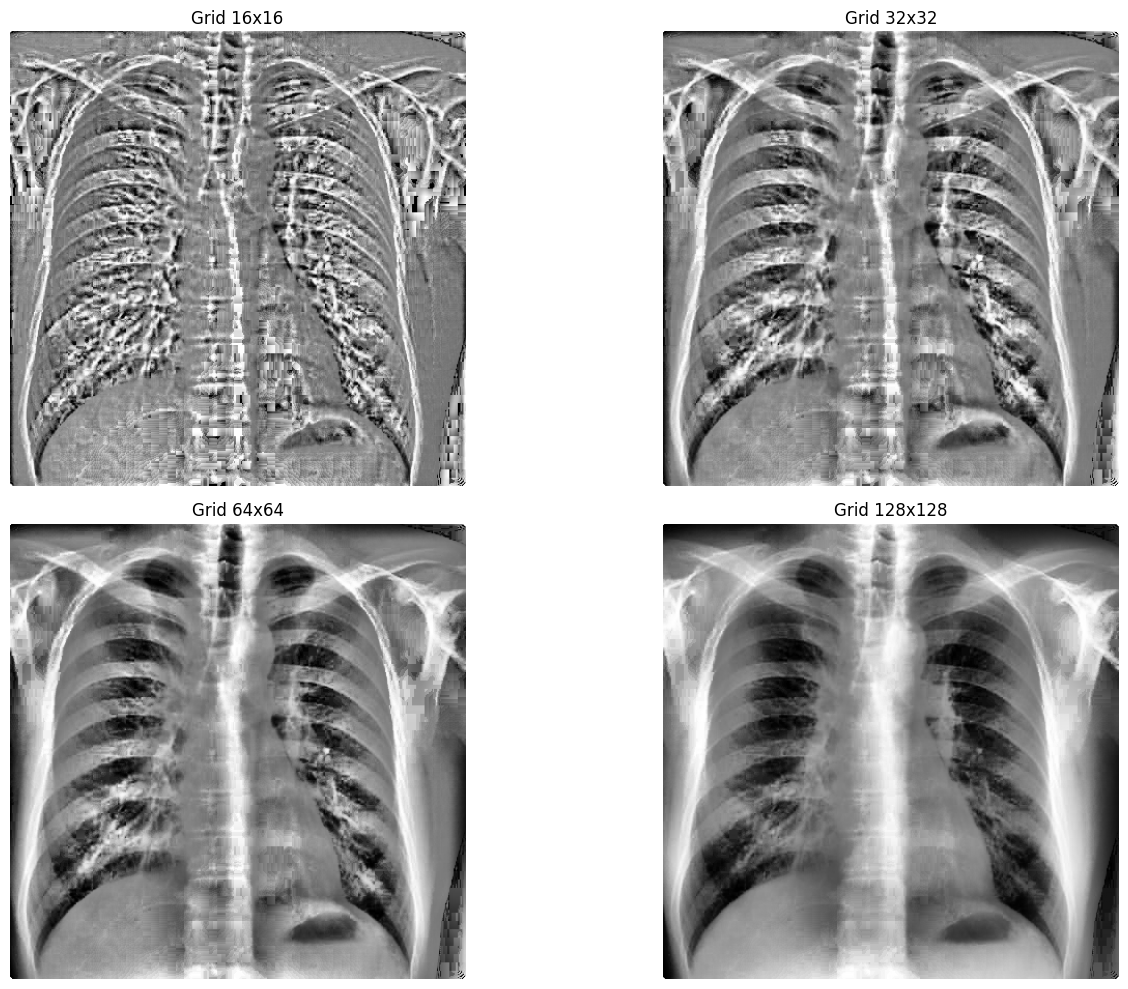

In [24]:

image = cv2.imread('ACE.jpg', cv2.IMREAD_GRAYSCALE)

grid_sizes = [(16, 16), (32, 32), (64, 64), (128, 128)]
results = {}

for size in grid_sizes:
    output = ACE(image, size)
    results[f'Grid {size[0]}x{size[1]}'] = output
    cv2.imwrite(f'ACE_output_{size[0]}x{size[1]}.jpg', output)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

for i, (title, img) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:

def CLAHE(image, gridSize, threshold):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=threshold, tileGridSize=gridSize)
    output = clahe.apply(image)

    return output

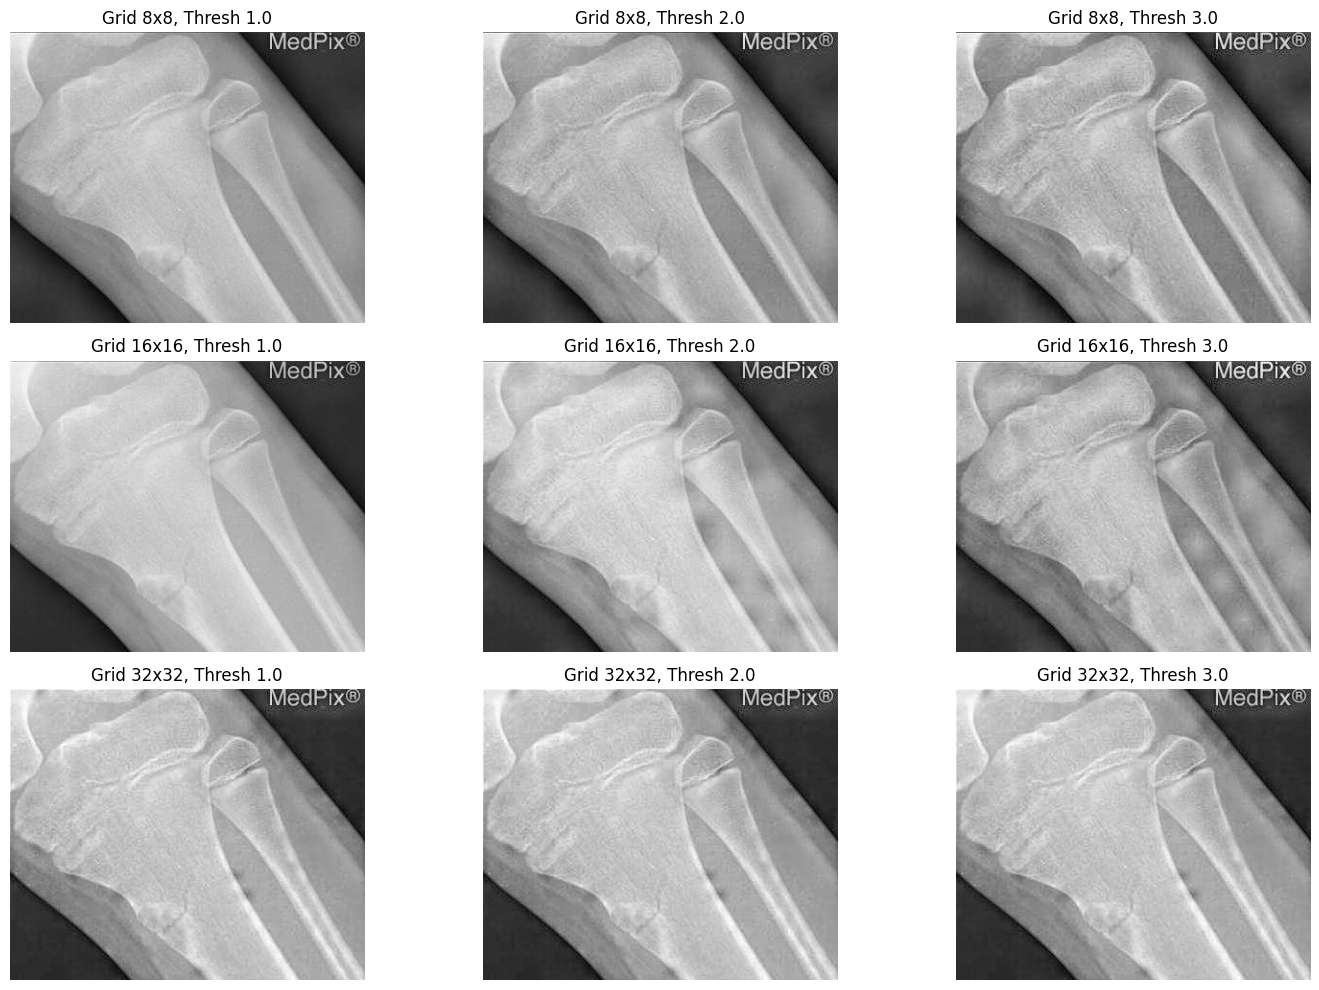

In [26]:

image = cv2.imread('CLAHE.jpg', cv2.IMREAD_GRAYSCALE)


grid_sizes = [(8, 8), (16, 16), (32, 32)]
thresholds = [1.0, 2.0, 3.0]
results = {}

for size in grid_sizes:
    for thresh in thresholds:
        output = CLAHE(image, size, thresh)
        key = f'Grid {size[0]}x{size[1]}, Thresh {thresh}'
        results[key] = output
        cv2.imwrite(f'CLAHE_output_{size[0]}x{size[1]}_thresh{thresh}.jpg', output)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

for i, (title, img) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

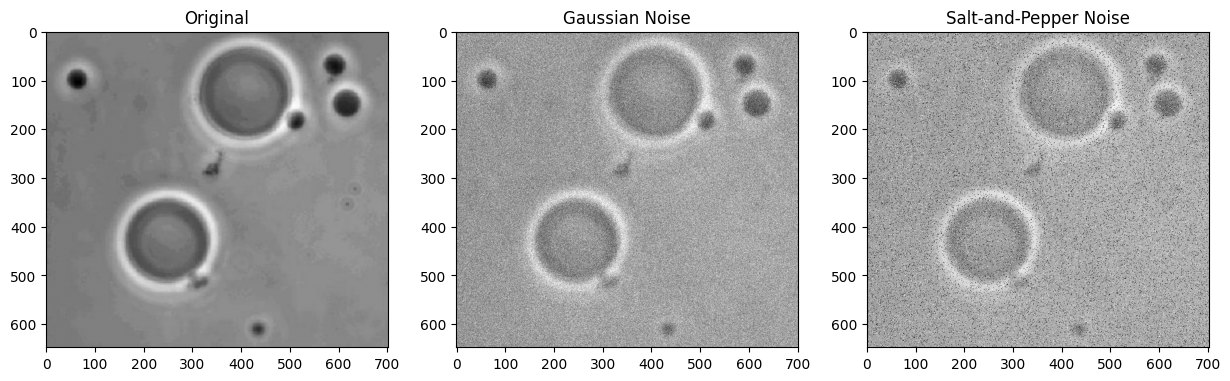

True

In [28]:

def add_noise(image, noise_type, args):

    output_image = image.copy().astype(np.float32)
    h, w = image.shape

    if noise_type == 0:
        mean, sigma = args

        noise = np.zeros_like(image, dtype=np.float32)
        for i in range(h):
            for j in range(w):

                u1 = np.random.random()
                u2 = np.random.random()
                z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2 * np.pi * u2)
                noise[i, j] = mean + sigma * z0
        output_image += noise

    else:
        prob = args[0]
        for i in range(h):
            for j in range(w):
                rand = np.random.random()
                if rand < prob:
                    output_image[i, j] = 0  # Pepper
                elif rand > 1 - prob:
                    output_image[i, j] = 255  # Salt

    output_image = np.clip(output_image, 0, 255).astype(np.uint8)
    return output_image

image = cv2.imread('noise.tif', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Could not load 'noise.tif'. Please check the file path.")

gaussian_noisy = add_noise(image, 0, [0, 25])

snp_noisy = add_noise(image, 1, [0.05])


plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(gaussian_noisy, cmap='gray'), plt.title('Gaussian Noise')
plt.subplot(133), plt.imshow(snp_noisy, cmap='gray'), plt.title('Salt-and-Pepper Noise')
plt.show()

cv2.imwrite('gaussian_noise.jpg', gaussian_noisy)
cv2.imwrite('salt_pepper_noise.jpg', snp_noisy)

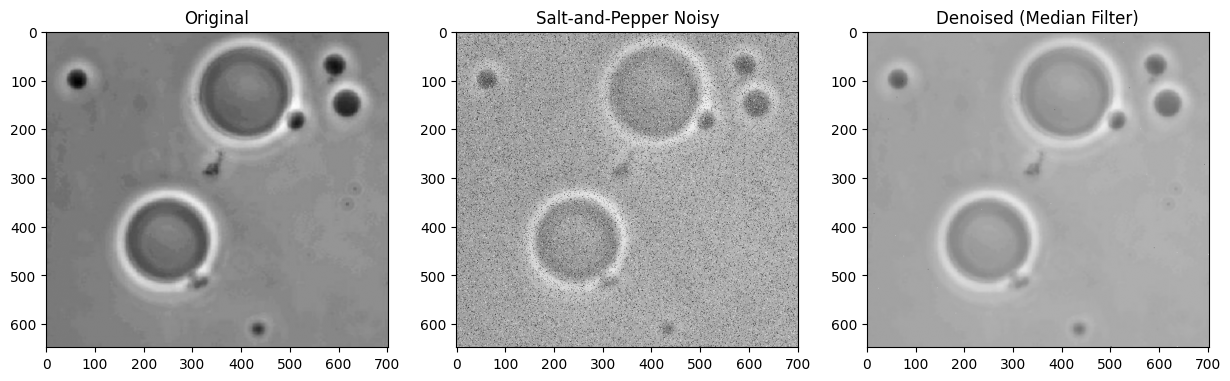

In [29]:
def denoise(noisy_image):

    output = noisy_image.copy()
    h, w = noisy_image.shape
    kernel_size = 3
    pad = kernel_size // 2


    padded = np.pad(noisy_image, pad, mode='reflect')

    for i in range(h):
        for j in range(w):

            neighborhood = padded[i:i+kernel_size, j:j+kernel_size]

            output[i, j] = np.median(neighborhood)

    return output

image = cv2.imread('noise.tif', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Could not load 'noise.tif'")

noisy_image = add_noise(image, 1, [0.05])
cv2.imwrite('salt_pepper_noisy.jpg', noisy_image)


denoised_image = denoise(noisy_image)
cv2.imwrite('denoised.jpg', denoised_image)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(noisy_image, cmap='gray'), plt.title('Salt-and-Pepper Noisy')
plt.subplot(133), plt.imshow(denoised_image, cmap='gray'), plt.title('Denoised (Median Filter)')
plt.show()